In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from typing import List, Dict, Tuple, Any
import sys
import os

root_path = os.path.abspath(os.path.join(os.path.dirname(Path.cwd()), '.'))
sys.path.append(root_path)

root_path

from datamodel import *

In [61]:
# Load data
root_dir = Path.cwd().parent
data_dir = root_dir / 'data'

day_minus_2 = pd.read_csv(data_dir / 'prices_round_1_day_-2.csv', sep=';')
day_minus_1 = pd.read_csv(data_dir / 'prices_round_1_day_-1.csv', sep=';')
day_0 = pd.read_csv(data_dir / 'prices_round_1_day_0.csv', sep=';')

price_data = pd.concat([day_minus_2, day_minus_1, day_0], axis=0)
price_data = price_data.reset_index(drop=True)
price_data_amethyst = price_data[price_data["product"] == "AMETHYSTS"].copy()
price_data_amethyst = price_data_amethyst.reset_index(drop=True)
price_data_starfruit = price_data[price_data["product"] == "STARFRUIT"].copy()
price_data_starfruit = price_data_starfruit.reset_index(drop=True)

trades_minus_2 = pd.read_csv(data_dir / 'trades_round_1_day_-2_nn.csv', sep=';')
trades_minus_1 = pd.read_csv(data_dir / 'trades_round_1_day_-1_nn.csv', sep=';')
trades_0 = pd.read_csv(data_dir / 'trades_round_1_day_0_nn.csv', sep=';')

trades = pd.concat([trades_minus_2, trades_minus_1, trades_0], axis=0)
trades = trades.reset_index(drop=True)
trades_amethyst = trades[trades["symbol"] == "AMETHYSTS"].copy()
trades_amethyst = trades_amethyst.reset_index(drop=True)
trades_starfruit = trades[trades["symbol"] == "STARFRUIT"].copy()
trades_starfruit = trades_starfruit.reset_index(drop=True)

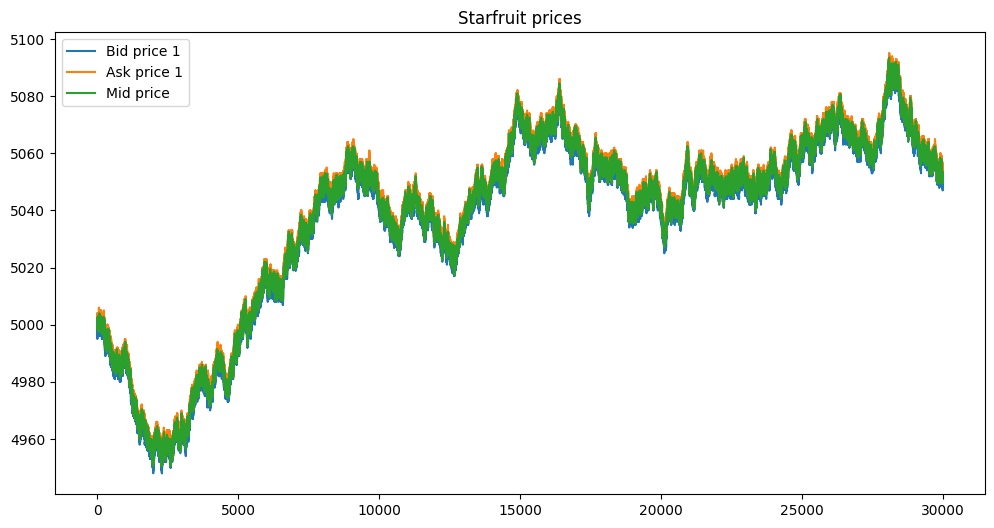

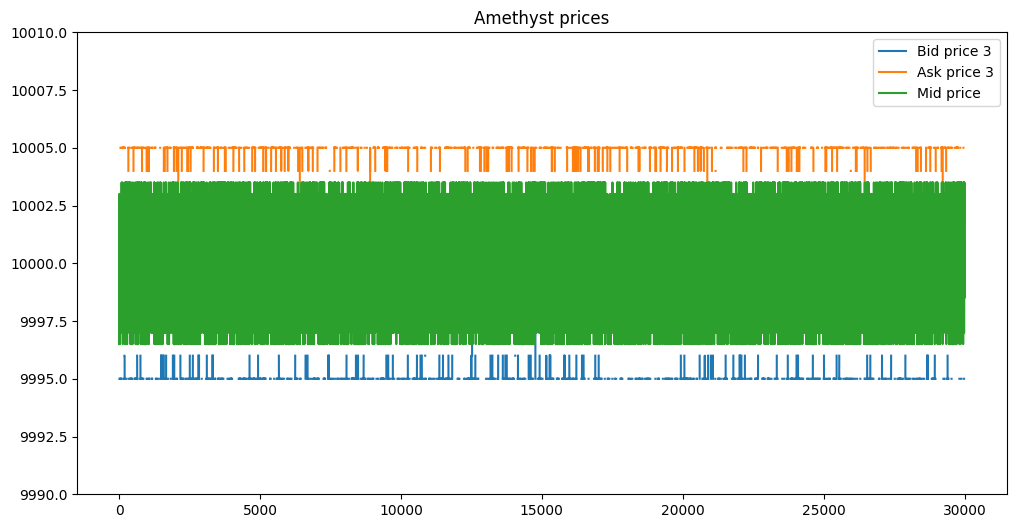

In [57]:
# Plot bid_price_1, ask_price_1 and mid price for starfruit
plt.figure(figsize=(12, 6))
plt.plot(price_data_starfruit["bid_price_1"], label="Bid price 1")
plt.plot(price_data_starfruit["ask_price_1"], label="Ask price 1")
plt.plot(price_data_starfruit["mid_price"], label="Mid price")
plt.title("Starfruit prices")
plt.legend()
plt.show()

# Plot bid_price_1, ask_price_1 and mid price for amethyst, set y-axis range from 9000 to 11000

plt.figure(figsize=(12, 6))
plt.plot(price_data_amethyst["bid_price_1"], label="Bid price 1")
plt.plot(price_data_amethyst["ask_price_1"], label="Ask price 1")
plt.plot(price_data_amethyst["mid_price"], label="Mid price")
plt.title("Amethyst prices")
plt.ylim(9990, 10010)
plt.legend()
plt.show()

In [47]:
price_data_amethyst

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
2,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
3,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
4,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
29996,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
29997,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
29998,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [32]:
class MyTrader:

    def __init__(self, limits: Dict[str, Tuple[float, float]] = {}):
        self.limits = limits # Dictionary to store the limits as a tuple for each product, product -> (short_limit, long_limit)
        
    def print_input_state(self, state: TradingState):
        print("\nINPUT TRADING STATE")
        print("===================\n")
        print(f"# TraderData: {[str(state.traderData)]}")
        print(f"# Products: {[k for k,v in state.order_depths.items()]}")
        for product, order_depth in state.order_depths.items():
            print(f"## Orders for {product}")
            for price, volume in order_depth.buy_orders.items():
                print(f"### Buy Orders {volume}x {price}")
            for price, volume in order_depth.sell_orders.items():
                print(f"### Sell Orders {volume}x {price}")
        for product, listing in state.listings.items():
            print(f"# Listing for {product}:")
            print(f"## Symbol: {listing.symbol}")
            print(f"## Denomination: {listing.denomination}")
        print(f"# Own Trades: {state.own_trades}")
        print(f"# Market Trades: {state.market_trades}")
        print(f"# Position: {state.position}")
        print(f"# Observations: {str(state.observations)}")
        print("\n")
    
    def run(self, state: TradingState):
        # Only method required. It takes all buy and sell orders for all symbols as an input, and outputs a list of orders to be sent
        self.print_input_state(state)
        print("Start Evaluation:")
        print("=================\n")
        result = {}
        for product in state.order_depths:
            print(f"# Product: {product}")
            order_depth: OrderDepth = state.order_depths[product]
            orders: List[Order] = []
            acceptable_price = get_acceptable_price_for_product(product, state)
            print("## Acceptable price : " + str(acceptable_price))
            print("## Buy Order depth : " + str(len(order_depth.buy_orders)) + ", Sell order depth : " + str(len(order_depth.sell_orders)))
    
            if len(order_depth.sell_orders) != 0:
                best_ask, best_ask_amount = list(order_depth.sell_orders.items())[0]
                if int(best_ask) < acceptable_price * 0.999:
                    print("## BUY", str(-best_ask_amount) + "x", best_ask)
                    orders.append(Order(product, best_ask, -best_ask_amount))
    
            if len(order_depth.buy_orders) != 0:
                best_bid, best_bid_amount = list(order_depth.buy_orders.items())[0]
                if int(best_bid) > acceptable_price * 1.001:
                    print("## SELL", str(best_bid_amount) + "x", best_bid)
                    orders.append(Order(product, best_bid, -best_bid_amount))
            
            result[product] = orders

        orders = self.adjust_for_position_breaches(orders, True)
    
    
        traderData = "SAMPLE" # String value holding Trader state data required. It will be delivered as TradingState.traderData on next execution.
        
        conversions = 1
        return result, conversions, traderData
    
    def adjust_for_position_breaches(self, orders, fill_until_position_breach=False):
        for order in orders:
            print(f"{product}")
            product = order.symbol
            position = self.position[product]
            if position + order.quantity < self.short_limits[product]:
                print(f"Short Position breach for product {product} with position {position} and order {order}")
                if fill_until_position_breach:
                    orders[product] = Order(product, order.price, self.limits[product][0] - position)
            if position + order.quantity > self.long_limits[product]:
                print(f"Long Position breach for product {product} with position {position} and order {order}")
                if fill_until_position_breach:
                    orders[product] = Order(product, order.price, self.limits[product][1] - position)
            if not fill_until_position_breach:
                orders[product] = None
        return orders

def get_acceptable_price_for_product(product, state):
    product_trade_history = state.market_trades[product]
    product_order_depth = state.order_depths[product]
    if len(product_trade_history) == 0:
        return get_mid_price_from_order_book(product_order_depth)
    else:
        return product_trade_history[0].price
    
def get_mid_price_from_order_book(order_depth):
    best_bid = list(order_depth.buy_orders.keys())[0]
    best_ask = list(order_depth.sell_orders.keys())[0]
    return (best_bid + best_ask) / 2

In [33]:
import time
timestamp = time.time()

listings = {
	"PRODUCT1": Listing(
		symbol="PRODUCT1", 
		product="PRODUCT1", 
		denomination= "SEASHELLS"
	),
	"PRODUCT2": Listing(
		symbol="PRODUCT2", 
		product="PRODUCT2", 
		denomination= "SEASHELLS"
	),
}

order_depths = {
	"PRODUCT1": OrderDepth(
		buy_orders={12: 7, 9: 5},
		sell_orders={11: -4, 12: -8}
	),
	"PRODUCT2": OrderDepth(
		buy_orders={142: 3, 141: 5},
		sell_orders={144: -5, 145: -8}
	),	
}

own_trades = {
	"PRODUCT1": [],
	"PRODUCT2": []
}

market_trades = {
	"PRODUCT1": [
		Trade(
			symbol="PRODUCT1",
			price=11,
			quantity=4,
			buyer="",
			seller="",
			timestamp=900
		)
	],
	"PRODUCT2": []
}

position = {
	"PRODUCT1": -15,
	"PRODUCT2": -5
}

observations = {}
traderData = ""

state = TradingState(
	traderData,
	timestamp,
    listings,
	order_depths,
	own_trades,
	market_trades,
	position,
	observations
)

limits = {
	"PRODUCT1": (-20, 20),
	"PRODUCT2": (-20, 20)
}

trader = MyTrader(limits)
result, conversions, traderData = trader.run(state)

print(f"Result: {result}")
print(f"Conversions: {conversions}")
print(f"TraderData: {traderData}")



INPUT TRADING STATE

# TraderData: ['']
# Products: ['PRODUCT1', 'PRODUCT2']
## Orders for PRODUCT1
### Buy Orders 7x 12
### Buy Orders 5x 9
### Sell Orders -4x 11
### Sell Orders -8x 12
## Orders for PRODUCT2
### Buy Orders 3x 142
### Buy Orders 5x 141
### Sell Orders -5x 144
### Sell Orders -8x 145
# Listing for PRODUCT1:
## Symbol: PRODUCT1
## Denomination: SEASHELLS
# Listing for PRODUCT2:
## Symbol: PRODUCT2
## Denomination: SEASHELLS
# Own Trades: {'PRODUCT1': [], 'PRODUCT2': []}
# Market Trades: {'PRODUCT1': [(PRODUCT1,  << , 11, 4, 900)], 'PRODUCT2': []}
# Position: {'PRODUCT1': -15, 'PRODUCT2': -5}
# Observations: {}


Start Evaluation:

# Product: PRODUCT1
## Acceptable price : 11
## Buy Order depth : 2, Sell order depth : 2
## SELL 7x 12
# Product: PRODUCT2
## Acceptable price : 143.0
## Buy Order depth : 2, Sell order depth : 2
Result: {'PRODUCT1': [(PRODUCT1, 12, -7)], 'PRODUCT2': []}
Conversions: 1
TraderData: SAMPLE
